In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn import linear_model

years = range(2011, 2017)
directory = 'yosemite-temperatures/yosemite_village/'
files = [directory+'CRNS0101-05-%d-CA_Yosemite_Village_12_W.txt' % y for y in years]
usecols = [1, 2, 8]

data = [np.loadtxt(f, usecols=usecols) for f in files]
data = np.vstack(data)

# Map from HHmm to an integer
data[:, 1] = np.floor_divide(data[:, 1], 100) * 60 + np.mod(data[:, 1], 100)
valid = data[:, 2] > -1000


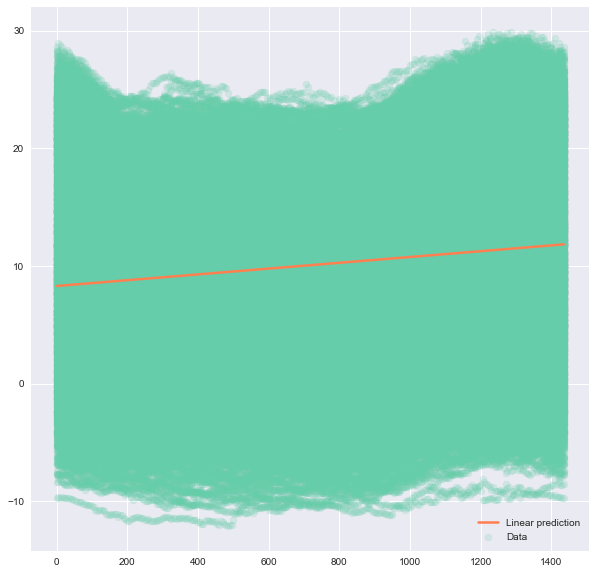

0.017208355718628887


In [3]:
x_train = data[valid, 1].reshape(-1, 1)
y_train = data[valid, 2]
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)

x_predict = [[0], [1435]]
y_predict = regr.predict(x_predict)

plt.figure(figsize=(10,10))
plt.scatter(data[valid, 1], data[valid, 2], label='Data', color='#66CDAA', alpha=0.2)
plt.plot(x_predict, y_predict, label='Linear prediction', color='coral', lw=2.5 )
plt.legend(loc='best')
plt.show()

print(regr.score(x_train, y_train))



In [50]:
heights = np.asarray(x_train).reshape(-1, 1)
weights = np.asarray(y_train).reshape(-1, 1)
centers = np.asarray(np.arange(1,1000,5)).reshape(-1, 1)
print("centers.shape", centers.shape)
print("heights.shape", heights.shape)
print("weights.shape", weights.shape)

sigma = 0.5
alpha = 0.01

# New representation:
x = rbf_kernel(heights, centers, gamma=1 / sigma)
print("x.shape", x.shape)
print("Original inputs", heights)
print("RBF repr", x)

# Now go and fit a linear model between x and height
regr = Ridge(alpha=alpha, fit_intercept=False).fit(x, weights)
print("Score on training data = ", regr.score(x, weights))


centers.shape (200, 1)
heights.shape (630854, 1)
weights.shape (630854, 1)
x.shape (630854, 200)
Original inputs [[   5.]
 [  10.]
 [  15.]
 ...
 [1430.]
 [1435.]
 [   0.]]
RBF repr [[1.26641655e-014 1.35335283e-001 5.38018616e-032 ... 0.00000000e+000
  0.00000000e+000 0.00000000e+000]
 [4.40853133e-071 1.26641655e-014 1.35335283e-001 ... 0.00000000e+000
  0.00000000e+000 0.00000000e+000]
 [5.70904011e-171 4.40853133e-071 1.26641655e-014 ... 0.00000000e+000
  0.00000000e+000 0.00000000e+000]
 ...
 [0.00000000e+000 0.00000000e+000 0.00000000e+000 ... 0.00000000e+000
  0.00000000e+000 0.00000000e+000]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000 ... 0.00000000e+000
  0.00000000e+000 0.00000000e+000]
 [1.35335283e-001 5.38018616e-032 7.95674389e-106 ... 0.00000000e+000
  0.00000000e+000 0.00000000e+000]]
Score on training data =  -0.7109741811694197


In [ ]:
from sklearn.kernel_ridge import KernelRidge
clf = KernelRidge(kernel='rbf', gamma=0.5, alpha=0.001)
clf.fit(x_train,y_train)
print("Score on training data = ", clf.score(x_train, y_train))

centers.shape (6, 1)
heights.shape (4, 1)
weights.shape (4, 1)
x.shape (4, 6)
Original inputs [[1.32]
 [1.45]
 [1.66]
 [1.88]]
RBF repr [[0.81481026 0.97161077 0.98728157 0.85487502 0.63077882 0.39661073]
 [0.66697681 0.8824969  0.99501248 0.95599748 0.78270454 0.54607443]
 [0.41844911 0.65494763 0.87354119 0.99282586 0.96155838 0.79358073]
 [0.21250282 0.39661073 0.63077882 0.85487502 0.98728157 0.97161077]]
Score on training data =  0.9430228201545774
all_x.shape (1000, 1)
expanded_x.shape (1000, 6)
all_y.shape (1000, 1)


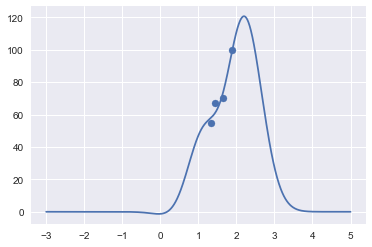

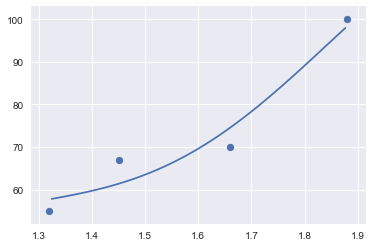

In [47]:
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
import numpy as np

heights = np.asarray([1.32, 1.45, 1.66, 1.88]).reshape(-1, 1)
weights = np.asarray([55, 67, 70, 100]).reshape(-1, 1)
centers = np.asarray([1.0, 1.2, 1.4, 1.6, 1.8, 2.0]).reshape(-1, 1)
print("centers.shape", centers.shape)
print("heights.shape", heights.shape)
print("weights.shape", weights.shape)

# I recommend playing around with these parameters and seeing how well you fit
# the data.  Changing one of the parameters will change the optimal value of
# the other:
sigma = 0.5
alpha = 0.0001

# New representation:
x = rbf_kernel(heights, centers, gamma=1 / sigma)
print("x.shape", x.shape)
print("Original inputs", heights)
print("RBF repr", x)

# Now go and fit a linear model between x and height
regr = Ridge(alpha=alpha, fit_intercept=False)
regr.fit(x, weights)
print("Score on training data = ", regr.score(x, weights))
all_x = np.linspace(-3.0, 5.0, 1000).reshape(-1, 1)

# New representation:
expanded_x = rbf_kernel(all_x, centers, gamma=1 / sigma)
all_y = regr.predict(expanded_x)
print("all_x.shape", all_x.shape)
print("expanded_x.shape", expanded_x.shape)
print("all_y.shape", all_y.shape)

# Show that the predictions tend to zero far away from inputs
plt.figure()
plt.plot(all_x, all_y)
plt.scatter(heights, weights)

# Zoom in and see how well predictions fit the data
zoom_ind = (all_x > heights.min()) & (all_x < heights.max())
plt.figure()
plt.plot(all_x[zoom_ind], all_y[zoom_ind])
plt.scatter(heights, weights)
plt.show()
